In [ ]:
# Cell 1: Imports

import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
# Cell 2: Load Wine dataset (different from Iris!)

wine = load_wine()

X = wine.data                # ویژگی‌ها (13 ستون عددی)
y = wine.target              # برچسب‌ها (0، 1، 2)
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("🔹 چند سطر اول دیتاست Wine:")
display(df.head())

print("\n🔹 نام کلاس‌ها:")
for i, name in enumerate(target_names):
    print(f"{i} → {name}")


🔹 چند سطر اول دیتاست Wine:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



🔹 نام کلاس‌ها:
0 → class_0
1 → class_1
2 → class_2


In [ ]:
# Cell 3: Train-test split & Gaussian Naive Bayes

X = df[feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("✅ مدل Gaussian Naive Bayes آموزش دید.")
print("🎯 دقت (Accuracy) روی داده‌ی تست:", acc)


✅ مدل Gaussian Naive Bayes آموزش دید.
🎯 دقت (Accuracy) روی داده‌ی تست: 0.9722222222222222


📄 گزارش طبقه‌بندی:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

🔢 ماتریس سردرگمی:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


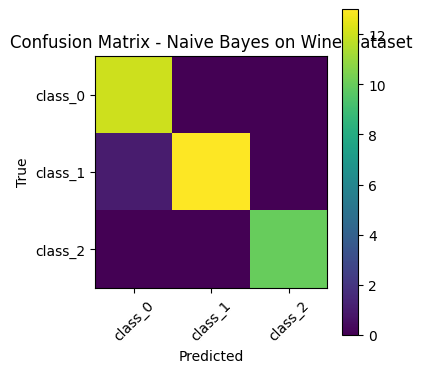

In [ ]:
# Cell 4: Evaluation – classification report & confusion matrix

print("📄 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
print("🔢 ماتریس سردرگمی:")
print(cm)

# رسم ماتریس سردرگمی
plt.figure(figsize=(4,4))
plt.imshow(cm)
plt.title("Confusion Matrix - Naive Bayes on Wine Dataset")
plt.colorbar()
plt.xticks(ticks=[0,1,2], labels=target_names, rotation=45)
plt.yticks(ticks=[0,1,2], labels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
# Cell 5: Example prediction on a single test sample

sample = X_test.iloc[0]
true_class = y_test.iloc[0]

print("ویژگی‌های نمونه انتخاب‌شده:")
for name, value in zip(feature_names, sample.values):
    print(f"{name}: {value}")

pred_class = nb_model.predict([sample.values])[0]
pred_proba = nb_model.predict_proba([sample.values])[0]

print("\nکلاس واقعی:", target_names[true_class])
print("کلاس پیش‌بینی‌شده:", target_names[pred_class])

print("\nاحتمال‌های پیش‌بینی‌شده برای هر کلاس:")
for name, p in zip(target_names, pred_proba):
    print(f"{name}: {p:.4f}")


ویژگی‌های نمونه انتخاب‌شده:
alcohol: 14.1
malic_acid: 2.16
ash: 2.3
alcalinity_of_ash: 18.0
magnesium: 105.0
total_phenols: 2.95
flavanoids: 3.32
nonflavanoid_phenols: 0.22
proanthocyanins: 2.38
color_intensity: 5.75
hue: 1.25
od280/od315_of_diluted_wines: 3.17
proline: 1510.0

کلاس واقعی: class_0
کلاس پیش‌بینی‌شده: class_0

احتمال‌های پیش‌بینی‌شده برای هر کلاس:
class_0: 1.0000
class_1: 0.0000
class_2: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
# Cell 6: Auto-generated Persian report for Naive Bayes on Wine dataset

report = f"""
در این پروژه، روش Naive Bayes (مدل GaussianNB) روی دیتاست Wine از مجموعه داده‌های sklearn پیاده‌سازی شد.
این دیتاست شامل ۱۳ ویژگی عددی شیمیایی از نمونه‌های مختلف شراب بوده و هدف مدل، طبقه‌بندی هر نمونه
در یکی از سه کلاس مختلف شراب است.

داده‌ها به دو بخش آموزش و تست تقسیم شدند (۸۰٪ آموزش، ۲۰٪ تست) و مدل Gaussian Naive Bayes
روی داده‌های آموزش یاد گرفت و سپس روی داده‌ی تست ارزیابی شد.

نتیجه‌ی به‌دست‌آمده برای دقت مدل روی داده‌ی تست به صورت زیر است:
- Accuracy = {accuracy_score(y_test, y_pred):.4f}

گزارش طبقه‌بندی و ماتریس سردرگمی نشان می‌دهند که این مدل، با وجود فرض استقلال شرطی بین ویژگی‌ها،
در تفکیک کلاس‌های مختلف شراب عملکرد قابل قبولی دارد و می‌تواند به عنوان یک روش ساده و سریع
برای مسائل طبقه‌بندی چندکلاسه مورد استفاده قرار گیرد.
"""

print(report)



در این پروژه، روش Naive Bayes (مدل GaussianNB) روی دیتاست Wine از مجموعه داده‌های sklearn پیاده‌سازی شد.
این دیتاست شامل ۱۳ ویژگی عددی شیمیایی از نمونه‌های مختلف شراب بوده و هدف مدل، طبقه‌بندی هر نمونه
در یکی از سه کلاس مختلف شراب است.

داده‌ها به دو بخش آموزش و تست تقسیم شدند (۸۰٪ آموزش، ۲۰٪ تست) و مدل Gaussian Naive Bayes
روی داده‌های آموزش یاد گرفت و سپس روی داده‌ی تست ارزیابی شد.

نتیجه‌ی به‌دست‌آمده برای دقت مدل روی داده‌ی تست به صورت زیر است:
- Accuracy = 0.9722

گزارش طبقه‌بندی و ماتریس سردرگمی نشان می‌دهند که این مدل، با وجود فرض استقلال شرطی بین ویژگی‌ها،
در تفکیک کلاس‌های مختلف شراب عملکرد قابل قبولی دارد و می‌تواند به عنوان یک روش ساده و سریع
برای مسائل طبقه‌بندی چندکلاسه مورد استفاده قرار گیرد.

